<a href="https://colab.research.google.com/github/ThatCodeCodingGuy/Toxic-Comment-Detector/blob/main/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessary Packages and Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics, svm
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# **Downloading the CSV File**

In [2]:
!wget https://raw.githubusercontent.com/surge-ai/copilot-toxicity/main/toxicity.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import urllib.request

url = "https://raw.githubusercontent.com/surge-ai/toxicity/main/toxicity_en.csv"
urllib.request.urlretrieve(url, "toxicity_en.csv")
print("Downloaded toxicity_en.csv")

Downloaded toxicity_en.csv


# **Glancing at the data**

In [3]:
df = pd.read_csv('toxicity_en.csv')

In [4]:
df.head()

text is_toxic
0  Elon Musk is a piece of shit, greedy capitalis...    Toxic
1  The senile credit card shrill from Delaware ne...    Toxic
2  He does that a lot -- makes everyone look good...    Toxic
3                                         F*ck Lizzo    Toxic
4  Epstein and trump were best buds!!! Pedophiles...    Toxic

In [5]:
df.groupby('text').count()

is_toxic
text                                                        
" Amazing Humans"????Not in my book( Pun intend...         1
"Guns don't kill people....Alec Baldwin does."             1
"How to correctly hit a #woman" #feminism #isla...         1
"I am asking you in a very educated manner" bit...         1
"I'm a full on rapist... I mean a philanthropis...         1
...                                                      ...
{nods in agreement} Stay in school and keep pra...         1
“Bitch, you ain’t takin SHIT, but’choo can DAMN...         1
“You Trumpsters better pray that liberals never...         1
☭ WHY DO #LIBERALS HATE #AMERICA? ☹ WHY DOES A ...         1
🔻👽👁🔻\n ANTI ASIAN and LOVING it!!!                         1

[999 rows x 1 columns]

<Axes: xlabel='is_toxic'>

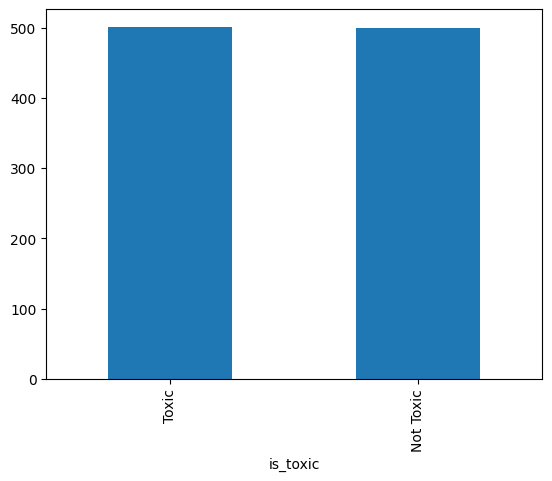

In [6]:
df['is_toxic'].value_counts().plot(kind='bar')

# **Cleaning the Text**

In [7]:
def clean_text(text):
    # make text lowercase
    text = text.lower()
    # removing text within parentheses
    text = re.sub('\(.*?\)', '', text)
    # removing numbers
    text = re.sub('\w*\d\w*', '', text)
    # if there's more than 1 whitespace, then make it just 1
    text = re.sub('\s+', ' ', text)
    # if there's a new line, then make it a whitespace
    text = re.sub('\n', ' ', text)
    # removing any quotes
    text = re.sub('\"+', '', text)
    # getting rid of punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    return text

clean = lambda x: clean_text(x)

<>:5: SyntaxWarning: invalid escape sequence '\('
<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\('
<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Admin\AppData\Local\Temp\ipykernel_16256\3755762056.py:5: SyntaxWarning: invalid escape sequence '\('
  text = re.sub('\(.*?\)', '', text)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16256\3755762056.py:7: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16256\3755762056.py:9: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text)


In [8]:
df['clean_text'] = df['text'].apply(clean)

In [9]:
df.head()

text is_toxic  \
0  Elon Musk is a piece of shit, greedy capitalis...    Toxic   
1  The senile credit card shrill from Delaware ne...    Toxic   
2  He does that a lot -- makes everyone look good...    Toxic   
3                                         F*ck Lizzo    Toxic   
4  Epstein and trump were best buds!!! Pedophiles...    Toxic   

                                          clean_text  
0  elon musk is a piece of shit greedy capitalist...  
1  the senile credit card shrill from delaware ne...  
2  he does that a lot  makes everyone look good b...  
3                                          fck lizzo  
4  epstein and trump were best buds pedophiles wh...

In [10]:
text_df = df[['clean_text', 'is_toxic']].copy()

In [11]:
text_df.head()

clean_text is_toxic
0  elon musk is a piece of shit greedy capitalist...    Toxic
1  the senile credit card shrill from delaware ne...    Toxic
2  he does that a lot  makes everyone look good b...    Toxic
3                                          fck lizzo    Toxic
4  epstein and trump were best buds pedophiles wh...    Toxic

In [12]:
text_df['is_toxic'] = text_df['is_toxic'].replace('Toxic', 1)
text_df['is_toxic'] = text_df['is_toxic'].replace('Not Toxic', 0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16256\200339844.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  text_df['is_toxic'] = text_df['is_toxic'].replace('Not Toxic', 0)


In [13]:
text_df.head()

clean_text  is_toxic
0  elon musk is a piece of shit greedy capitalist...         1
1  the senile credit card shrill from delaware ne...         1
2  he does that a lot  makes everyone look good b...         1
3                                          fck lizzo         1
4  epstein and trump were best buds pedophiles wh...         1

In [51]:
data = text_df['clean_text']
target = text_df['is_toxic']

# Looking at the most frequent words of unclean and clean versions of the data 

*Unclean Data*

In [ ]:
# import nltk

# # Clear old paths and append only your new folder
# nltk.data.path = []
# nltk.data.path.append(r"C:\Users\Admin\OneDrive\Desktop\Toxic_Comment_Detector\nltk_data")

In [ ]:
# nltk.download('punkt', download_dir=nltk.data.path[-1])

[nltk_data] Downloading package punkt to C:\Users\Admin\OneDrive\Deskt
[nltk_data]     op\Toxic_Comment_Detector\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
# # # looking at the unclean data
# # def unfiltered_tokens(text):
# #     dirty_tokens = nltk.word_tokenize(text)
# #     return dirty_tokens
# import nltk
# from nltk.tokenize import word_tokenize

# # Clear old paths
# nltk.data.path = []

# # Append only your fresh folder
# nltk.data.path.append(r"C:\Users\Admin\TCD_nltk_data")

# # Force download punkt into that folder
# nltk.download('punkt', download_dir=nltk.data.path[-1])

# # Test download by printing the path
# print("NLTK paths:", nltk.data.path)


NLTK paths: ['C:\\Users\\Admin\\TCD_nltk_data']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\TCD_nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
import nltk

# keep defaults
print("Before:", nltk.data.path)

# add your own folder safely
nltk.data.path.append(r"C:\Users\Admin\TCD_nltk_data")

print("After:", nltk.data.path)


Before: ['C:\\Users\\Admin/nltk_data', 'c:\\Users\\Admin\\OneDrive\\Desktop\\Toxic_Comment_Detector - Copy\\venv\\nltk_data', 'c:\\Users\\Admin\\OneDrive\\Desktop\\Toxic_Comment_Detector - Copy\\venv\\share\\nltk_data', 'c:\\Users\\Admin\\OneDrive\\Desktop\\Toxic_Comment_Detector - Copy\\venv\\lib\\nltk_data', 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']
After: ['C:\\Users\\Admin/nltk_data', 'c:\\Users\\Admin\\OneDrive\\Desktop\\Toxic_Comment_Detector - Copy\\venv\\nltk_data', 'c:\\Users\\Admin\\OneDrive\\Desktop\\Toxic_Comment_Detector - Copy\\venv\\share\\nltk_data', 'c:\\Users\\Admin\\OneDrive\\Desktop\\Toxic_Comment_Detector - Copy\\venv\\lib\\nltk_data', 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'C:\\Users\\Admin\\TCD_nltk_data']


In [16]:
nltk.data.path.append(r"nltk_data")

print("After:", nltk.data.path)


After: ['C:\\Users\\Admin/nltk_data', 'c:\\Users\\Admin\\OneDrive\\Desktop\\Toxic_Comment_Detector - Copy\\venv\\nltk_data', 'c:\\Users\\Admin\\OneDrive\\Desktop\\Toxic_Comment_Detector - Copy\\venv\\share\\nltk_data', 'c:\\Users\\Admin\\OneDrive\\Desktop\\Toxic_Comment_Detector - Copy\\venv\\lib\\nltk_data', 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'C:\\Users\\Admin\\TCD_nltk_data', 'nltk_data']


In [17]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
from nltk.tokenize import word_tokenize
print(word_tokenize("Hello, I am testing NLTK!"))

['Hello', ',', 'I', 'am', 'testing', 'NLTK', '!']


In [19]:

# looking at the unclean data
def unfiltered_tokens(text):
    dirty_tokens = nltk.word_tokenize(text)
    return dirty_tokens
     

In [52]:

# applying this function to the `clean_text` column
unfiltered_data = list(map(unfiltered_tokens, data))

In [53]:
from nltk import FreqDist

flat_unfiltered = [item for sublist in unfiltered_data for item in sublist]
dirty_corpus_freqdist = FreqDist(flat_unfiltered)
dirty_corpus_freqdist.most_common(20)


[('the', 916),
 ('and', 594),
 ('a', 590),
 ('to', 538),
 ('i', 477),
 ('of', 399),
 ('you', 394),
 ('is', 376),
 ('that', 299),
 ('in', 285),
 ('it', 284),
 ('for', 235),
 ('’', 230),
 ('this', 229),
 ('are', 184),
 ('he', 166),
 ('be', 158),
 ('with', 154),
 ('on', 141),
 ('your', 139)]

*Clean Data*

In [54]:
from nltk.corpus import stopwords
import nltk

# download stopwords if not already present
nltk.download('stopwords')

# define set of English stop words
stop_words = set(stopwords.words('english'))

print(len(stop_words), "stopwords loaded")


198 stopwords loaded


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
def process_text(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [56]:
print(data)

0      elon musk is a piece of shit greedy capitalist...
1      the senile credit card shrill from delaware ne...
2      he does that a lot  makes everyone look good b...
3                                              fck lizzo
4      epstein and trump were best buds pedophiles wh...
                             ...                        
995    my maternal abuelita taught me how to make pla...
996    funnily enough i was looking online last week ...
997    i cant bear how nice this is i guess its bearn...
998    going to buy a share of tesla just to ensure i...
999    i only saw a couple of these throughout the mo...
Name: clean_text, Length: 1000, dtype: object


In [57]:
# applying the above function to our data/features 
processed_data = list(map(process_text, data))

In [58]:
print(processed_data)

[['elon', 'musk', 'piece', 'shit', 'greedy', 'capitalist', 'exploits', 'workers', 'offers', 'nothing', 'real', 'benefit', 'world', '’', 'done', 'make', 'name', 'backs', 'people', 'using', 'dirty', 'money', 'family', '’', 'emerald', 'mine', 'acquired', 'apartheid', '’', 'care', '’', 'autistic', 'thinks', 'cured', 'company', '’', 'ai', 'chip', 'representation', 'community', '’', 'celebrate', 'page'], ['senile', 'credit', 'card', 'shrill', 'delaware', 'needs', 'resign'], ['lot', 'makes', 'everyone', 'look', 'good', 'himi', 'guess', 'also', 'probably', 'dems', 'media', 'force', 'compulsively', 'tweet', 'abject', 'bullshit', 'like', 'lying', 'bitch', 'theyre', 'tricky', 'libs'], ['fck', 'lizzo'], ['epstein', 'trump', 'best', 'buds', 'pedophiles', 'play', 'together'], ['hell', 'sending', 'biden', 'world', 'meeting', 'representing', 'america', 'diaper', 'load', 'doesnt', 'represent', 'anything', 'regarding', 'support', 'protection', 'constitution', 'citizens', 'country'], ['know', 'another', 

In [59]:
total_vocab = set()
for comment1 in processed_data:
    for comment in comment1:    
        total_vocab.update(comment)
        print(total_vocab)
len(total_vocab)

{'o', 'l', 'n', 'e'}
{'u', 'l', 'k', 'm', 'e', 's', 'o', 'n'}
{'i', 'u', 'l', 'k', 'p', 'm', 'e', 's', 'o', 'n', 'c'}
{'i', 'u', 'l', 'k', 'p', 't', 'h', 'm', 'e', 's', 'o', 'n', 'c'}
{'i', 'u', 'l', 'r', 'k', 'p', 't', 'd', 'h', 'm', 'e', 's', 'g', 'y', 'o', 'n', 'c'}
{'i', 'u', 'l', 'r', 'k', 'p', 't', 'd', 'a', 'h', 'm', 'e', 's', 'g', 'y', 'o', 'n', 'c'}
{'i', 'd', 's', 'g', 'l', 'a', 'h', 'm', 'e', 'y', 'n', 'u', 'p', 'o', 'c', 'r', 'k', 't', 'x'}
{'i', 'w', 'd', 's', 'g', 'l', 'a', 'h', 'm', 'e', 'y', 'n', 'u', 'p', 'o', 'c', 'r', 'k', 't', 'x'}
{'i', 'w', 'd', 's', 'g', 'l', 'a', 'h', 'm', 'e', 'y', 'n', 'u', 'p', 'o', 'c', 'r', 'k', 't', 'x', 'f'}
{'i', 'w', 'd', 's', 'g', 'l', 'a', 'h', 'm', 'e', 'y', 'n', 'u', 'p', 'o', 'c', 'r', 'k', 't', 'x', 'f'}
{'i', 'w', 'd', 's', 'g', 'l', 'a', 'h', 'm', 'e', 'y', 'n', 'u', 'p', 'o', 'c', 'r', 'k', 't', 'x', 'f'}
{'i', 'w', 'd', 's', 'g', 'b', 'l', 'a', 'h', 'm', 'e', 'y', 'n', 'u', 'p', 'o', 'c', 'r', 'k', 't', 'x', 'f'}
{'i', 'w', 'd

115

In [60]:
# turning the data into a readable list and getting top 20 words
flat_filtered = [item for sublist in processed_data for item in sublist]
clean_corpus_freqdist = FreqDist(flat_filtered)
clean_corpus_freqdist.most_common(20)

[('’', 230),
 ('like', 123),
 ('people', 85),
 ('get', 74),
 ('good', 68),
 ('would', 63),
 ('go', 61),
 ('im', 52),
 ('see', 51),
 ('love', 50),
 ('never', 48),
 ('one', 47),
 ('know', 46),
 ('dont', 46),
 ('biden', 45),
 ('really', 44),
 ('time', 42),
 ('think', 42),
 ('way', 40),
 ('joe', 39)]

# **Lemmatization**

In [61]:

# creating a list with all lemmatized outputs
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [62]:
X_lem = lemmatized_output
y_lem = target

# **Splitting the dataset into Train-Test and Vectorization**

In [63]:
print(X_lem)

['elon musk piece shit greedy capitalist exploit worker offer nothing real benefit world ’ done make name back people using dirty money family ’ emerald mine acquired apartheid ’ care ’ autistic think cured company ’ ai chip representation community ’ celebrate page', 'senile credit card shrill delaware need resign', 'lot make everyone look good himi guess also probably dems medium force compulsively tweet abject bullshit like lying bitch theyre tricky libs', 'fck lizzo', 'epstein trump best bud pedophile play together', 'hell sending biden world meeting representing america diaper load doesnt represent anything regarding support protection constitution citizen country', 'know another fantasy hopeful thinking biden desperate pardoned sin know pope save man jesus demented biden condoned greatest atrocity time allowing murdering innocent unborn baby also left young men behind enemy line die selfish motivation also condemned innocent men woman child life poverty due unrelentless lie covid

In [64]:
y_lem

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: is_toxic, Length: 1000, dtype: int64

In [72]:
from nltk.corpus import stopwords

stop_words = list(stopwords.words('english'))  # convert set → list

tfidf = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2))
tfidf_data_train = tfidf.fit_transform(X_train)
tfidf_data_test = tfidf.transform(X_test)


In [76]:
tfidf_data_train = tfidf.fit_transform(X_train)
tfidf_data_test = tfidf.transform(X_test)

# **Modeling: SVM, Logistic Regression and Multinomial Naive Bayes**

# **SVM**

In [77]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', class_weight='balanced', random_state=20)

In [79]:
# fitting the dataset to the model and predicting the labels on validation dataset
import time

start = time.time()
SVM.fit(tfidf_data_train, y_train)
SVM_test_preds = SVM.predict(tfidf_data_test)
end = time.time()

print(f"Training and prediction took {end - start:.2f} seconds")

SVM.fit(tfidf_data_train, y_train)
SVM_test_preds = SVM.predict(tfidf_data_test)

Training and prediction took 0.16 seconds


In [80]:
# measuring the performance fo the model by several metrics
SVM_precision = precision_score(y_test, SVM_test_preds)
SVM_recall = recall_score(y_test, SVM_test_preds)
SVM_f1_score = f1_score(y_test, SVM_test_preds)
SVM_weighted_f1_score = f1_score(y_test, SVM_test_preds, average='weighted')

In [81]:
# printing evaluation metrics up to 4th decimal place
print('Precision: {:.4}'.format(SVM_precision))
print('Recall: {:.4}'.format(SVM_recall))
print('F1 Score: {:.4}'.format(SVM_f1_score))
print('Weighted F1 Score: {:.4}'.format(SVM_weighted_f1_score))

Precision: 0.8218
Recall: 0.83
F1 Score: 0.8259
Weighted F1 Score: 0.825


In [82]:
# creating dictionary with all metrics
metric_dict = {}
metric_dict['SVM'] = {'precision': SVM_precision, 'recall': SVM_recall, 'f1_score': SVM_f1_score}

# **Logistic Regression**

In [83]:
logreg_baseline = LogisticRegression(penalty='l2', class_weight='balanced', random_state=20)

In [84]:
%%time
logreg_baseline.fit(tfidf_data_train, y_train)
logreg_test_preds = logreg_baseline.predict(tfidf_data_test)

CPU times: total: 31.2 ms
Wall time: 32.5 ms


In [85]:
logreg_precision = precision_score(y_test, logreg_test_preds)
logreg_recall = recall_score(y_test, logreg_test_preds)
logreg_f1_score = f1_score(y_test, logreg_test_preds)
logreg_weighted_f1_score = f1_score(y_test, logreg_test_preds, average='weighted')

In [86]:
print('Precision: {:.4}'.format(logreg_precision))
print('Recall: {:.4}'.format(logreg_recall))
print('F1 Score: {:.4}'.format(logreg_f1_score))

Precision: 0.8163
Recall: 0.8
F1 Score: 0.8081


In [87]:
metric_dict['Logistic Regression'] = {'precision': logreg_precision, 'recall': logreg_recall, 'f1_score': logreg_f1_score}

# **Multinomial Naive Bayes**

In [88]:
bayes = MultinomialNB(alpha = .01)

In [89]:
bayes.fit(tfidf_data_train, y_train)
bayes_test_preds = bayes.predict(tfidf_data_test)

In [90]:
bayes_precision = precision_score(y_test, bayes_test_preds)
bayes_recall = recall_score(y_test, bayes_test_preds)
bayes_f1_score = f1_score(y_test, bayes_test_preds)
bayes_f1_weighted = f1_score(y_test, bayes_test_preds, average='weighted')

In [91]:
print('Precision: {:.4}'.format(bayes_precision))
print('Recall: {:.4}'.format(bayes_recall))
print('F1 Score: {:.4}'.format(bayes_f1_score))

Precision: 0.8148
Recall: 0.88
F1 Score: 0.8462


In [92]:
metric_dict[ 'Naive Bayes'] = {'precision': bayes_precision, 'recall': bayes_recall, 'f1_score': bayes_f1_score}

# **Comparison of the results**

In [93]:
pd.DataFrame.from_dict(metric_dict, orient='index')

precision  recall  f1_score
SVM                   0.821782    0.83  0.825871
Logistic Regression   0.816327    0.80  0.808081
Naive Bayes           0.814815    0.88  0.846154

# **Pickling necessary features for later use**

In [94]:
import pickle 
pickle_out = open("X_train.pickel", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

In [95]:
pickle_out = open("final_bayes.pickel", "wb")
pickle.dump(bayes, pickle_out)
pickle_out.close()